# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller subproblems on your own.

Additional guidance is provided for concepts that did not make it into our class time. 

# Topic: A selection of the financial industrie's factor zoo. 

you will learn about

- most often used factor returns (market factor, size factor, value factor, profitability , investment , short-term reversal factor, momentum factor)

- linear factor modeling (backbone of todays asset management industry)

- Principal component analysis of factor returns

- Quantifying information content of factors for daily returns on SP500 constituents. 

# Background Knowledge (not necessary, yet helpful to grasp the context, for solving the Problem Set)
$$
\\
$$

**Some quant firm on FF-5**

https://www.robeco.com/en/insights/2015/10/fama-french-5-factor-model-why-more-is-not-always-better.html


# Background Knowledge (not necessary to solve Problem Set):
$$
\\
$$

**If you are curious what industry means by the term Factor Investing, feel free to watch some vidoes of this playlist**

https://www.youtube.com/watch?v=d1fz4LFquv4&list=PLyQSjcv8LwAHcUWCG-zRWbzuczxa0hB3n
$$
\\
$$

**Quant Blog on Fama-French 5-Factor Model**

https://blog.quantinsti.com/fama-french-five-factor-asset-pricing-model/
    

# Tasks [Degree of Difficulty: Beginner]: 
$$
\\
$$

**Notice:** The return data for SP500 constituents is given in "r_SP500_d_cleaned_Dec2020.csv"

$$
\\
$$

## A: Getting Data

**A.1** Get daily returns of so called FF5 factor returns (MKT, size, HML, RMW, CMA) and the risk-free rate  

**A.2** Include the short-term reversal and momentum factor to end up with a FF7 factor return matrix

**A.3** Ensure that the daily returns of SP500 constituents (data file is delivered) aligns with A.1 and A.2 

$$
\\
$$
**Hint:**
The merged data for FF7, Rf and SP500 constituents are in **R_d.csv**
$$
\\
$$

 
 

## B: Factor Analysis

**B.1** How many principal components are necessary to explain at least 96\% of variations in FF7?

**B.2** How much variance does each principal component of FF7 explain?

**B.3** Does each factor of FF7 span a different risk factor? Defend your answer.  

**B.4** Which of the FF7 factor is most (least) important for explaining the first principal component of US Blue Chip returns?

**B.5** Do FF7 factors explain variations in other than the first principal component of US Blue Chip returns? 
$$
\\
$$
**Hint:**
B.3: look at correlation table; high correlations imply common information

B.4: regress PC1(r) onto FF7. Check point estimates and t-stats. Largest t-stat together with largest point estimate (assuming features of FF7 have same scale) tells me this is the most important factor. The opposite holds for the least import factor.

B.5: take (say) the first 20 principal components of the SP500 panel. Regress each PC onto the FF7 and record the adj.R2. Plot the adj.R2 against the nr of PCs.

 
 

# Tasks [Degree of Difficulty: Advanced]:

$$
\\
$$

**Notice:** The return data for SP500 constituents is given in "r_SP500_d_cleaned_Dec2020.csv"

$$
\\
$$

## A: Getting Data

**A.1** Get daily returns of so called FF5 factor returns (MKT, size, HML, RMW, CMA) and the risk-free rate  

**A.2** Include the short-term reversal and momentum factor to end up with a FF7 factor return matrix

**A.3** Ensure that the daily returns of SP500 constituents (data file is delivered) aligns with A.1 and A.2 

$$
\\
$$
**Hint:**
H_A_1: Page 12 of https://buildmedia.readthedocs.org/media/pdf/pandas-datareader/stable/pandas-datareader.pdf

H_A_3: The aligned data consists of 5241 data points, starts on Jan 4th 2000 and ends October 30th 2020.

$$
\\
$$
 
 

## B: Factor Analysis

**B.1** How many principal components are necessary to explain at least 96\% of variations in FF7?

**B.2** How much variance does each principal component of FF7 explain?

**B.3** Does each factor of FF7 span a different risk factor? Defend your answer.  

**B.4** Which of the FF7 factor is most (least) important for explaining the first principal component of US Blue Chip returns?

**B.5** Do FF7 factors explain variations in other than the first principal component of US Blue Chip returns? 
$$
\\
$$
**Hint:**
B.3: look at correlation table and/or regress every factor onto all other FF7.

B.4: use regression techniques to answer this question

B.5: use regression techniques to answer this question

 

# Tasks [Degree of Difficulty: Expert]:


$$
\\
$$

**Notice:** The return data for SP500 constituents is given in "r_SP500_d_cleaned_Dec2020.csv"

$$
\\
$$

## A: Getting Data

**A.1** Get daily returns of so called FF5 factor returns (MKT, size, HML, RMW, CMA) and the risk-free rate  

**A.2** Include the short-term reversal and momentum factor to end up with a FF7 factor return matrix

**A.3** Ensure that the daily returns of SP500 constituents (data file is delivered) aligns with A.1 and A.2 

$$
\\
$$
**Hint:**
H_A_3: The aligned data consists of 5241 data points, starts on Jan 4th 2000 and ends October 30th 2020.

$$
\\
$$

 

## B: Factor Analysis

**B.1** How many principal components are necessary to explain at least 96\% of variations in FF7?

**B.2** How much variance does each principal component of FF7 explain?

**B.3** Does each factor of FF7 span a different risk factor? Defend your answer.

**B.4** Which of the FF7 factor is most (least) important for explaining the first principal component of US Blue Chip returns?

**B.5** Do FF7 factors explain variations in other than the first principal component of US Blue Chip returns? 

 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller

We are going to read the data in the csv file. We will also parse the dates so that they are stored in the pandas file

We can se that the first 6 colums contain the factors asked in question A.1, while the first 8 columns are the ones asked for in A.2

In [128]:
data1 = pd.read_csv("R_d.csv", parse_dates=True, index_col=0)
data2 = pd.read_csv("r_SP500_d_cleaned_Dec2020.csv", parse_dates=True, index_col=0)
fullSet = pd.merge(data1,data2,on="Date", how="inner")
us = data1.iloc[:,8:]
ff5 = fullSet.iloc[:,:6]
ff7 = fullSet.iloc[:,:8]

In [129]:
us

,MMM,ABT,ABMD,ATVI,ADBE,AMD,AES,AFL,A,APD,...,WDC,WY,WHR,WMB,XEL,XRX,XLNX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.040547,-0.028988,-0.024265,-0.030890,-0.087618,-0.058108,-0.040463,-0.026894,-0.079464,-0.030950,...,0.174353,-0.038291,-0.039180,-0.022427,0.022765,-0.047628,-0.022990,-0.020305,-0.014534,-0.049635
2000-01-05,0.028555,-0.001840,0.010471,0.003914,0.019578,0.025318,0.010715,-0.005756,-0.064037,0.005877,...,-0.068993,0.051619,0.014614,0.060018,0.037859,0.050209,-0.022131,0.005115,0.018963,-0.001184
2000-01-06,0.077358,0.034392,0.001735,-0.019725,0.008130,0.064539,0.007961,0.020001,-0.038820,0.064293,...,0.041964,0.045717,0.008256,0.021134,-0.009331,-0.020834,-0.090705,-0.008540,-0.055665,0.014118
2000-01-07,0.019656,0.010620,-0.005213,0.027507,0.047440,0.015504,0.019197,0.019609,0.080043,0.067282,...,0.209350,-0.033436,0.003079,0.026268,0.000000,0.023408,0.107350,-0.022551,-0.011160,0.002334
2000-01-10,-0.004878,-0.007067,0.133531,0.049159,0.037883,0.074108,0.043964,-0.061492,0.058813,-0.063626,...,-0.117783,-0.004369,0.012220,-0.018692,0.000000,-0.023408,0.049642,0.039558,0.033114,-0.018231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,-0.021670,0.011163,0.024223,-0.006810,-0.027604,0.003289,-0.003396,-0.028949,-0.014611,-0.026190,...,-0.029926,-0.033866,-0.020655,-0.038820,0.003074,-0.041921,-0.019623,-0.020751,-0.028792,-0.022541
2020-10-27,-0.031361,-0.003861,0.007567,0.005822,0.007046,-0.041593,-0.011730,-0.039101,0.013386,-0.010177,...,-0.004207,-0.031783,0.009029,0.011393,0.008888,-0.021368,0.082089,-0.012273,-0.019919,-0.043444
2020-10-28,-0.015647,-0.020094,-0.026191,-0.024381,-0.046164,-0.031945,-0.042175,-0.034819,-0.042182,-0.037814,...,-0.038170,-0.004728,-0.038416,-0.029260,-0.029036,-0.072199,-0.037610,-0.030357,-0.014204,-0.015564


In [23]:
np.round(ff7.tail(1),2)

,Mkt-RF,SMB,HML,RMW,CMA_x,RF_x,ST_Rev,Mom
Date,,,,,,,,
2020-10-30,-0.01,-0.0,0.02,0.0,0.0,0.0,0.0,-0.02


In [100]:
pca = PCA()
pca_ff7_ts = pca.fit(stats.zscore(ff7))
pc1_ff7 = pca_ff7_ts.transform(stats.zscore(ff7))[:,0]

In [46]:
np.round(np.cumsum(pca_ff7_ts.explained_variance_ratio_),2)

array([0.25, 0.46, 0.59, 0.72, 0.81, 0.89, 0.96, 1.  ])

In [74]:
listCorr = [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]

for i in range(8):
    for j in range(8):
        listCorr[i][j] = np.round(np.corrcoef(ff7.iloc[:,i],ff7.iloc[:,j])[0][1],2)

In [212]:
listCorr

[[1.0, 0.14, 0.1, -0.37, -0.26, -0.03, 0.37, -0.28],
 [0.14, 1.0, 0.13, -0.26, 0.04, -0.0, 0.07, -0.04],
 [0.1, 0.13, 1.0, 0.1, 0.43, 0.04, 0.01, -0.42],
 [-0.37, -0.26, 0.1, 1.0, 0.28, 0.04, -0.21, 0.11],
 [-0.26, 0.04, 0.43, 0.28, 1.0, 0.05, -0.26, 0.06],
 [-0.03, -0.0, 0.04, 0.04, 0.05, 1.0, 0.01, 0.02],
 [0.37, 0.07, 0.01, -0.21, -0.26, 0.01, 1.0, -0.12],
 [-0.28, -0.04, -0.42, 0.11, 0.06, 0.02, -0.12, 1.0]]

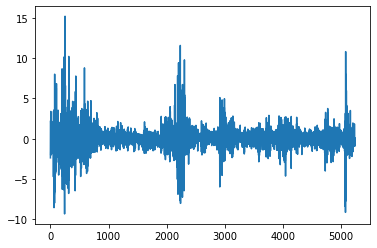

In [101]:
plt.plot(pc1_ff7)

In [115]:
for i in range(8):
    print(ff7.columns[i] + ": ",round(np.corrcoef(stats.zscore(ff7.iloc[:,i]),pc1_ff7)[0][1],2))

Mkt-RF:  0.76
SMB:  0.3
HML:  -0.04
RMW:  -0.68
CMA_x:  -0.58
RF_x:  -0.08
ST_Rev:  0.63
Mom   :  -0.39


In [147]:
pca = PCA()
pca_us_ts = pca.fit(stats.zscore(us))
pc_us = pca_us_ts.transform(stats.zscore(us))

In [231]:
for i in range(8):
    X = stats.zscore(ff7.iloc[:,i])
    X = sm.add_constant(X)
    y = pc_us[:,0]
    linReg = sm.GLS(y,X)
    output = linReg.fit()
    #print(output.summary())
    print(ff7.columns[i])
    print("R2:", np.round(output.rsquared_adj,2))
    print("Point est:", np.round(output.params[1],2))
    print("T-stat:", np.round(output.tvalues[1],2))
    print()

Mkt-RF
R2: 0.93
Point est: -11.04
T-stat: -269.15

SMB
R2: 0.03
Point est: -2.12
T-stat: -13.67

HML
R2: 0.07
Point est: -2.92
T-stat: -19.12

RMW
R2: 0.07
Point est: 3.09
T-stat: 20.33

CMA_x
R2: 0.02
Point est: 1.43
T-stat: 9.11

RF_x
R2: -0.0
Point est: 0.08
T-stat: 0.49

ST_Rev
R2: 0.12
Point est: -3.95
T-stat: -26.67

Mom   
R2: 0.12
Point est: 4.03
T-stat: 27.26



In [232]:
for i in range(20):
    print("PC_" + str(i+1) + " corr:", np.round(np.abs(np.corrcoef(ff7.T, pc_us[:,i])[8][:8]).mean(),2))

PC_1 corr: 0.31
PC_2 corr: 0.24
PC_3 corr: 0.18
PC_4 corr: 0.08
PC_5 corr: 0.1
PC_6 corr: 0.13
PC_7 corr: 0.11
PC_8 corr: 0.09
PC_9 corr: 0.07
PC_10 corr: 0.04
PC_11 corr: 0.08
PC_12 corr: 0.06
PC_13 corr: 0.06
PC_14 corr: 0.05
PC_15 corr: 0.03
PC_16 corr: 0.08
PC_17 corr: 0.03
PC_18 corr: 0.02
PC_19 corr: 0.03
PC_20 corr: 0.03


In [241]:
for i in range(20):
    X = ff7
    X = sm.add_constant(X)
    y = pc_us[:,i]
    linReg = sm.GLS(y,X)
    output = linReg.fit()
    #print(output.summary())
    print("PC_" + str(i))
    print("R2:", np.round(output.rsquared_adj,2))
    #print("Point est:", np.round(output.params[1],2))
    #print("T-stat:", np.round(output.tvalues[1],2))
    print()

PC_0
R2: 0.97

PC_1
R2: 0.44

PC_2
R2: 0.52

PC_3
R2: 0.07

PC_4
R2: 0.12

PC_5
R2: 0.26

PC_6
R2: 0.14

PC_7
R2: 0.11

PC_8
R2: 0.06

PC_9
R2: 0.01

PC_10
R2: 0.11

PC_11
R2: 0.06

PC_12
R2: 0.06

PC_13
R2: 0.07

PC_14
R2: 0.01

PC_15
R2: 0.06

PC_16
R2: 0.01

PC_17
R2: 0.01

PC_18
R2: 0.02

PC_19
R2: 0.01

